# Working with data 2017. Class 2 
## Contact
Javier Garcia-Bernardo
garcia@uva.nl


## 0. Structure
1. Data types, structures and code II
2. Tidy data: Pivoting and melting dataframes
3. Merging and concatenating dataframes
4. Working with missing data
5. My second plots

In [1]:
#Normal inputs
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt

%matplotlib inline

from IPython.display import Image, display

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

## 2. Tidy data
### 2.1 Observations and variables
- A variable is any characteristics, number, or quantity that can be measured or counted: e.g. income, height, happiness
    - Numeric: Numbers
        - Continuous: Area, height, etc
        - Discrete: The rolls of a die, most questions in surveys, etc
        
    - Categorical: Categories
        - Ordinal: Can be ordered. E.g. "high", "middle" and "low" income countries
        - Nominal: Cannot be ordered. E.g. "blue", "red" and "yellow" 
        
- An observation is each of the values of a variable: e.g. 800, 1.93, 8, "middle"

In [2]:
Image(url="http://www.abs.gov.au/websitedbs/a3121120.nsf/4a256353001af3ed4b2562bb00121564/5869990518bbb7feca257b55002261e0/Body/3.109A!OpenElement&FieldElemFormat=gif")

### 2.2 What is tidy data?
Based on: http://vita.had.co.nz/papers/tidy-data.pdf

Tidy data is a standard way of mapping the meaning of a dataset to its structure.  [...] In
tidy data:
1.  Each variable forms a column.
2.  Each observation forms a row.
3.  Each type of observational unit forms a table.

#### Advantages: Facilitate manipulation, visualisation and modelling
- Combining tables (merging two tables by the year)
- Plotting (df["x"] vs df["y"])
- Statistical models ("y" ~ "x" + C("year"))
- Examples adapted from http://stat405.had.co.nz/lectures/18-tidy-data.pdf

In [3]:
%%html
<h3>There are three variables in this data set. What are they? </h3> 
<table>
    <tr> <th></th> <th>2010</th> <th>2015</th> </tr>
    <tr> <td>Male</td> <td>0</td> <td>5</td> </tr>
    <tr> <td>Female</td> <td>1</td> <td>4</td> </tr>
</table>

,2010,2015
Male,0,5
Female,1,4


In [4]:
%%html
<h3>Tidy data</h3> 
<table>
    <tr> <th>year</th> <th>sex</th> <th>count</th> </tr>
    <tr> <td>2010</td> <td>female</td> <td>1</td> </tr>
    <tr> <td>2010</td> <td>male</td> <td>0</td> </tr>
    <tr> <td>2015</td> <td>female</td> <td>4</td> </tr>
    <tr> <td>2015</td> <td>male</td> <td>5</td> </tr>
</table>

year,sex,count
2010,female,1
2010,male,0
2015,female,4
2015,male,5


### What are the variables in the following dataset?

In [46]:
#Death rates per 1000 in Virginia in 1940.
virginia = pd.read_csv("data/virginia.txt")
virginia.columns = ["Age","Rural Male","Rural Female","Urban Male","Urban Female"]
virginia

,Age,Rural Male,Rural Female,Urban Male,Urban Female
0,50-54,11.7,8.7,15.4,8.4
1,55-59,18.1,11.7,24.3,13.6
2,60-64,26.9,20.3,37.0,19.3
3,65-69,41.0,30.9,54.6,35.1
4,70-74,66.0,54.3,71.1,50.0


### 2.3 Tidying messy datasets
Real datasets can, and often do, violate the three precepts of tidy data in almost every way
imaginable. While occasionally you do get a dataset that you can start analysing immediately,
this is the exception,  not the rule:
- Column headers are values, not variable names --> Melt
- Multiple variables are stored in one column --> Pivot
- Variables are stored in both rows and columns --> Melt then pivot

Melting


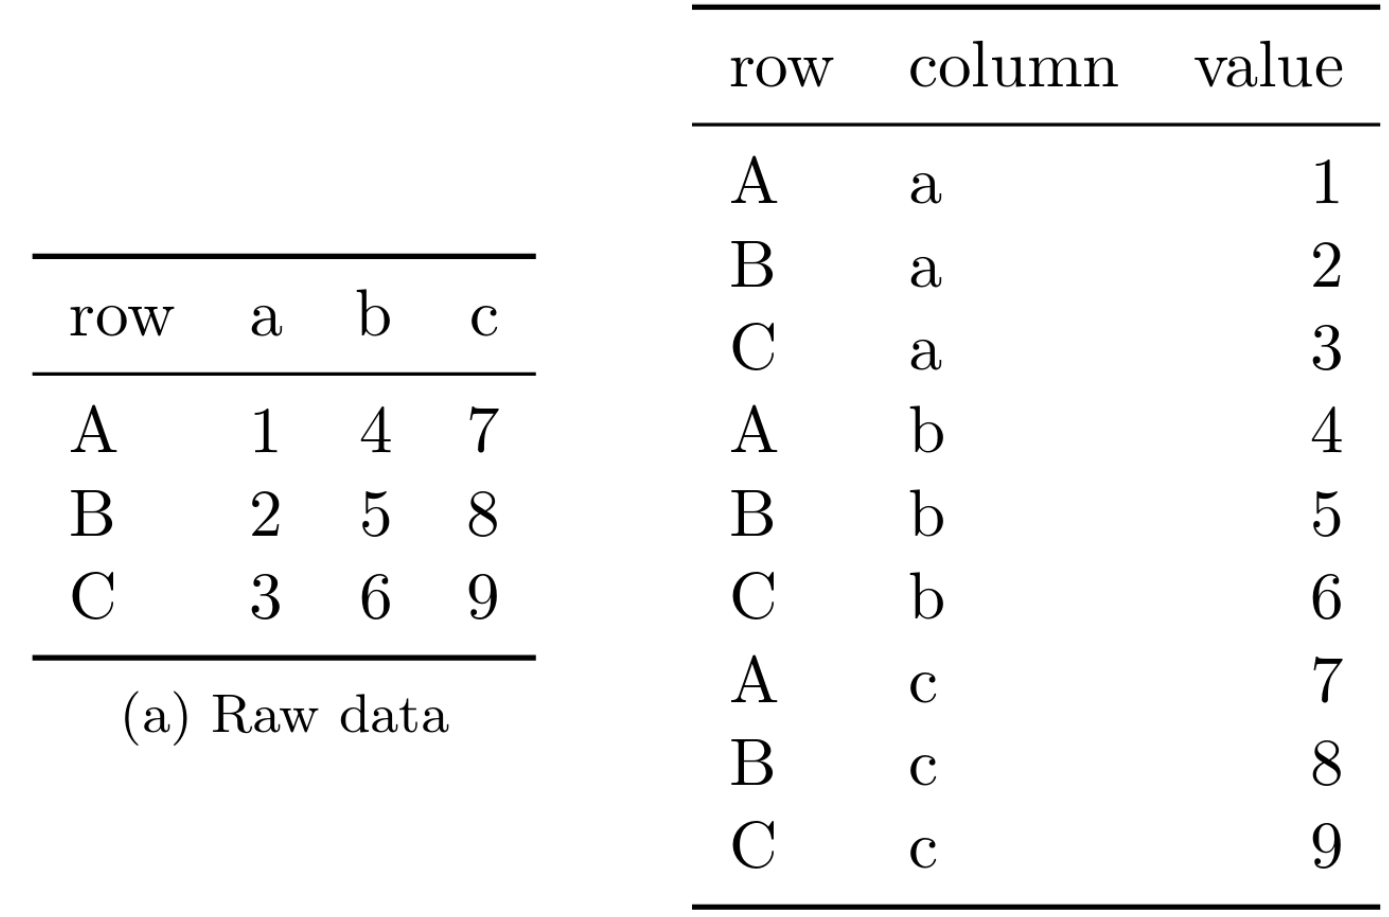

In [6]:
#Example of melting (columns to rows)
print("Melting")
Image("figures/melt.png",width=400)

Pivoting


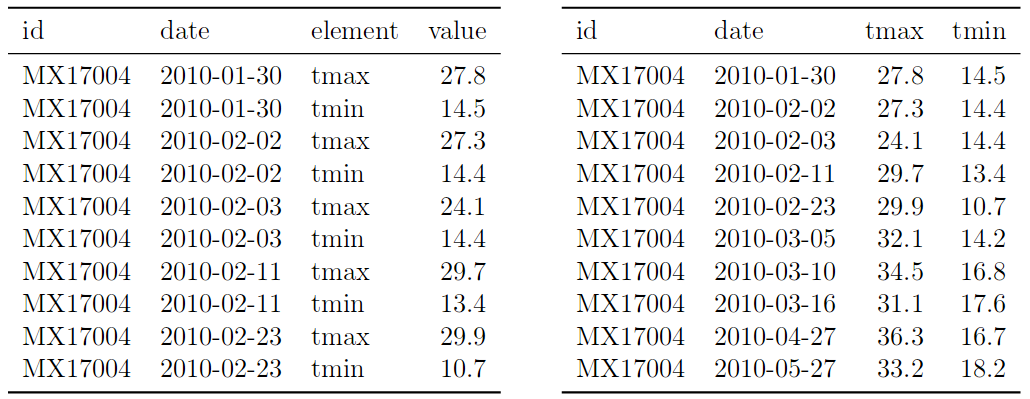

In [7]:
#Example of pivoting (rows to columns)
print("Pivoting")
Image("figures/pivot.png",width=800)

---

**Data to study: variations of https://stats.oecd.org/Index.aspx?DataSetCode=CITIES (which has problem 2)**

### 2.4 Column headers are values, not variable names: MELT

In [8]:
#Data on population density by year
df = pd.read_csv("data/columns_headers.csv")
df.head()

,Unnamed: 0,METRO_ID,Metropolitan areas,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,0,AT001,Vienna,267.27,269.90,272.56,275.26,277.99,280.75,283.54,286.38,289.24,292.15,295.09,298.07,301.08,304.14,307.23
1,1,AT002,Graz,179.92,181.59,183.28,185.01,186.76,188.55,190.36,192.20,194.07,195.97,197.91,199.87,201.87,203.90,205.96
2,2,AT003,Linz,165.29,165.94,166.60,167.27,167.94,168.62,169.31,170.00,170.70,171.41,172.12,172.84,173.57,174.31,175.05
3,3,AUS,Australia,2.47,2.50,2.53,2.56,2.59,2.62,2.65,2.70,2.76,2.82,2.86,2.90,2.95,3.00,3.05
4,4,AUS01,Sydney,332.15,335.48,338.18,340.38,342.20,344.88,348.04,353.71,360.58,367.35,372.51,376.88,382.38,388.94,395.83


In [9]:
### Fix

#Variables present in columns already
variables_already_presents = ['METRO_ID', 'Metropolitan areas']

#Variables to combine in one
columns_combine = ['2000', '2001', '2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011','2012', '2013', '2014']

#Fix
fixed = pd.melt(df,id_vars=variables_already_presents,
           value_vars=columns_combine,
           var_name="Year",
           value_name="POP_DENS")
fixed.head(10)

,METRO_ID,Metropolitan areas,Year,POP_DENS
0,AT001,Vienna,2000,267.27
1,AT002,Graz,2000,179.92
2,AT003,Linz,2000,165.29
3,AUS,Australia,2000,2.47
4,AUS01,Sydney,2000,332.15
5,AUS02,Melbourne,2000,342.35
6,AUS03,Brisbane,2000,107.48
7,AUS04,Perth,2000,226.80
8,AUS05,Adelaide,2000,351.60
9,AUS06,Gold Coast-Tweed Heads,2000,210.14


### 2.5 Multiple variables are stored in one column: PIVOT_TABLE

In [10]:
#Actual data from OECD
df = pd.read_csv("data/multiple_variables.csv")
df.head(2)

,Unnamed: 0,METRO_ID,Metropolitan areas,VAR,Variables,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,0,AT001,Vienna,POP_DENS,Population density (persons per km2),2000,2000,RATIO,Ratio,0,Units,NaN,NaN,267.27,NaN,NaN
1,1,AT001,Vienna,POP_DENS,Population density (persons per km2),2001,2001,RATIO,Ratio,0,Units,NaN,NaN,269.90,NaN,NaN


In [11]:
### Fix

#Columns already present
variables_already_present = ["METRO_ID","Metropolitan areas","Year"]

#Column with the variables
column_to_split = ["VAR"]

#Column with the values
column_with_values = "Value"

#Fix
df_fixed = df.pivot_table(column_with_values,
               variables_already_present,
               column_to_split)

df_fixed.head()

VAR                               GREEN_AREA_PC  POP_DENS
METRO_ID Metropolitan areas Year                         
AT001    Vienna             2000         255.17    267.27
                            2001         252.68    269.90
                            2002         250.22    272.56
                            2003         247.77    275.26
                            2004         245.34    277.99

In [12]:
#use .reset_index() to convert index to columns
df_fixed.reset_index()

VAR,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,AT001,Vienna,2000,255.17,267.27
1,AT001,Vienna,2001,252.68,269.90
2,AT001,Vienna,2002,250.22,272.56
3,AT001,Vienna,2003,247.77,275.26
4,AT001,Vienna,2004,245.34,277.99
5,AT001,Vienna,2005,242.92,280.75
6,AT001,Vienna,2006,240.53,283.54
7,AT001,Vienna,2007,238.15,286.38
8,AT001,Vienna,2008,235.79,289.24
9,AT001,Vienna,2009,233.44,292.15


### 2.6 Variables are stored in both rows and columns: MELT then PIVOT

In [13]:
df = pd.read_csv("data/multiple_variables_and_headers.csv")
df.head()

,Unnamed: 0,METRO_ID,Metropolitan areas,VAR,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,0,AT001,Vienna,GREEN_AREA_PC,255.17,252.68,250.22,247.77,245.34,242.92,240.53,238.15,235.79,233.44,231.12,228.81,226.52,224.24,221.99
1,1,AT001,Vienna,POP_DENS,267.27,269.90,272.56,275.26,277.99,280.75,283.54,286.38,289.24,292.15,295.09,298.07,301.08,304.14,307.23
2,2,AT002,Graz,GREEN_AREA_PC,997.39,988.23,979.10,969.96,960.85,951.75,942.72,933.67,924.67,915.69,906.73,897.83,888.95,880.11,871.29
3,3,AT002,Graz,POP_DENS,179.92,181.59,183.28,185.01,186.76,188.55,190.36,192.20,194.07,195.97,197.91,199.87,201.87,203.90,205.96
4,4,AT003,Linz,GREEN_AREA_PC,1791.92,1784.87,1777.80,1770.71,1763.59,1756.49,1749.38,1742.23,1735.10,1727.91,1720.77,1713.59,1706.40,1699.20,1691.99


In [14]:
cols = list(df.columns)[4:]
print(list(df.columns)[4:])

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']


In [15]:
### Fix setp 1
variables_already_presents = ['METRO_ID', 'Metropolitan areas','VAR']
columns_combine = cols
df = pd.melt(df,
           id_vars=variables_already_presents,
           value_vars=columns_combine,
           var_name="Year",
           value_name="Value")
df.head()

,METRO_ID,Metropolitan areas,VAR,Year,Value
0,AT001,Vienna,GREEN_AREA_PC,2000,255.17
1,AT001,Vienna,POP_DENS,2000,267.27
2,AT002,Graz,GREEN_AREA_PC,2000,997.39
3,AT002,Graz,POP_DENS,2000,179.92
4,AT003,Linz,GREEN_AREA_PC,2000,1791.92


In [16]:
### Fix step 2
column_with_values = "Value"
column_to_split = ["VAR"]
variables_already_present = ["METRO_ID","Metropolitan areas","Year"]
df.pivot_table(column_with_values,
               variables_already_present,
               column_to_split).reset_index().head()

VAR,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,AT001,Vienna,2000,255.17,267.27
1,AT001,Vienna,2001,252.68,269.90
2,AT001,Vienna,2002,250.22,272.56
3,AT001,Vienna,2003,247.77,275.26
4,AT001,Vienna,2004,245.34,277.99


## 3. Merging and concatenating datasets
Concatenate:
- Some times you obtain more data (with the same variables or different)

Merging:
- Many times you have several datasets that you have to combine according to a shared variable

### 3.1 Concatenate files (add more observations)

In [17]:
#Add more observations
Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png")

In [18]:
madrid = pd.read_csv("data/mad_twovariables.csv").head(2)
amsterdam = pd.read_csv("data/ams_twovariables.csv").head(2)
display(madrid)
display(amsterdam)



,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,ES001,Madrid,2000,31.5,471.88
1,ES001,Madrid,2001,31.0,479.60


,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,NL002,Amsterdam,2000,235.63,764.71
1,NL002,Amsterdam,2001,233.57,771.45


In [19]:
combined = pd.concat([madrid,amsterdam])
combined

,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,ES001,Madrid,2000,31.50,471.88
1,ES001,Madrid,2001,31.00,479.60
0,NL002,Amsterdam,2000,235.63,764.71
1,NL002,Amsterdam,2001,233.57,771.45


**Note that it's not a problem if the variables are not all the same**

But in that case you'll have missing values

In [20]:
a = pd.DataFrame([[1,2],[3,4]],columns=["a","b"])
b = pd.DataFrame([[1,2],[3,4]],columns=["c","b"])
display(a)
display(b)


,a,b
0,1,2
1,3,4


,c,b
0,1,2
1,3,4


In [21]:
pd.concat([a,b])

,a,b,c
0,1.0,2,NaN
1,3.0,4,NaN
0,NaN,2,1.0
1,NaN,4,3.0


### 3.2 Merge datasets

In [22]:
Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key.png",width=700)

In [23]:
ams_green = pd.read_csv("data/ams_green.csv")
ams_pop = pd.read_csv("data/ams_popdens.csv")
display(ams_green.head(2))
display(ams_pop.head(2))

,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC
0,NL002,Amsterdam,2000,235.63
1,NL002,Amsterdam,2001,233.57


,METRO_ID,Metropolitan areas,Year,POP_DENS
0,NL002,Amsterdam,2000,764.71
1,NL002,Amsterdam,2001,771.45


In [24]:
combined = pd.merge(ams_green,ams_pop,
         left_on=["METRO_ID","Metropolitan areas","Year"],
         right_on=["METRO_ID","Metropolitan areas","Year"],
         how="inner")
combined.head()

,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,NL002,Amsterdam,2000,235.63,764.71
1,NL002,Amsterdam,2001,233.57,771.45
2,NL002,Amsterdam,2002,231.51,778.30
3,NL002,Amsterdam,2003,229.46,785.26
4,NL002,Amsterdam,2004,227.41,792.34


In [25]:
print("Inner join pd.merge(left_df,right_df,how=\"inner\")")
display(Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key_inner.png"))
print("Right join pd.merge(left_df,right_df,how=\"right\")", "The same with left")
display(Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key_right.png"))
print("Outer join pd.merge(left_df,right_df,how=\"outer\")")
display(Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key_outer.png"))

Inner join pd.merge(left_df,right_df,how="inner")


Right join pd.merge(left_df,right_df,how="right") The same with left


Outer join pd.merge(left_df,right_df,how="outer")


## 4. "Real" example. Find relationship between green area in a city and density of population

In [26]:
def read_our_csv():
    #reading the raw data from oecd
    df = pd.read_csv("data/CITIES_19122016195113034.csv",sep="\t")

    #fixing the columns (the first one is ""METRO_ID"" instead of "METRO_ID")
    cols = list(df.columns)
    cols[0] = "METRO_ID"
    df.columns = cols
    
    #pivot the table
    column_with_values = "Value"
    column_to_split = ["VAR"]
    variables_already_present = ["METRO_ID","Metropolitan areas","Year"]
    df_fixed = df.pivot_table(column_with_values,
                 variables_already_present,
                 column_to_split).reset_index()
    
    return df_fixed
    

In [27]:
#Read and fix the data
df_fixed = read_our_csv()
df_fixed = df_fixed.loc[df_fixed["Year"]==2000,["GREEN_AREA_PC","POP_DENS"]]    
df_fixed.head()

VAR,GREEN_AREA_PC,POP_DENS
0,255.17,267.27
15,997.39,179.92
30,1791.92,165.29
45,NaN,2.47
60,55.38,332.15


###  SCATTER using sns.lmplot
Use to plot the relationship between two quantitative variables (and one qualitative variable using color)
- x = x axis
- y = y axis
- h = separate using color qualitative variable
- data = dataframe
- fit_reg = True to fit regression lines
- col = separate by another qualitative variable
- row = separate by anoyther qualitative variable
- size = size
- aspect = aspect (1 = square)
- sharex = share x axis
- sharey = share y axis

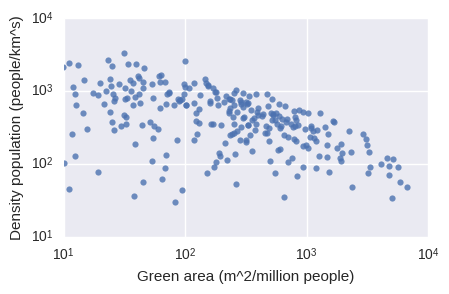

In [33]:
sns.lmplot(x="GREEN_AREA_PC",y="POP_DENS",data=df_fixed,fit_reg=False,size=3,aspect=1.6)

plt.yscale("log")
plt.xscale("log")
plt.ylim(10,10000)
plt.xlim(10,10000)
plt.xlabel("Green area (m^2/million people)")
plt.ylabel("Density population (people/km^s)")


### Is there a relationship between green area per capita and population density? Why?

---

**To calculate the fraction of green area**

$$\frac{m^2_{green}}{people} \cdot \frac{people}{km^2_{city}} = \frac{m^2_{green}}{km^2_{city}}$$

In [29]:
#fraction of green area
df_fixed["fraction_green"] = df_fixed["GREEN_AREA_PC"]*df_fixed["POP_DENS"]/1E6

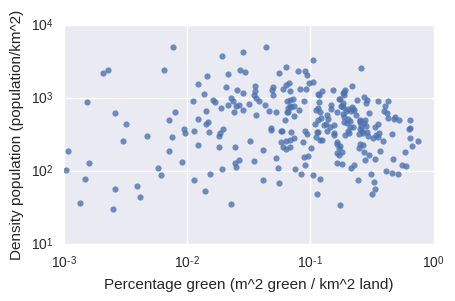

In [43]:
#make the figure
sns.lmplot(x="fraction_green",y="POP_DENS",data=df_fixed,fit_reg=False,size=3,aspect=1.6)
plt.yscale("log")
plt.xscale("log")
plt.ylim(10,10000)
plt.xlim(0.001,1)
plt.xlabel("Percentage green (m^2 green / km^2 land)")
plt.ylabel("Density population (population/km^2)")

In [39]:
df_fixed["log_fraction_green"]  = np.log10(df_fixed["fraction_green"])
df_fixed["log_POP_DENS"]  = np.log10(df_fixed["POP_DENS"])

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


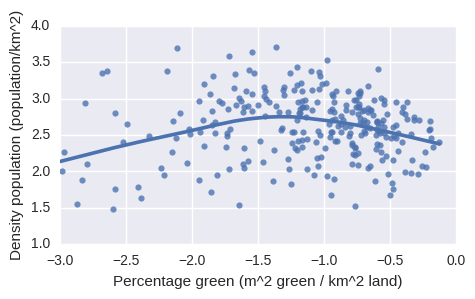

In [42]:
#make the figure
sns.lmplot(x="log_fraction_green",y="log_POP_DENS",data=df_fixed,lowess=True,size=3,aspect=1.6)
plt.ylim(1,4)
plt.xlim(-3,0)
plt.xlabel("Percentage green (m^2 green / km^2 land)")
plt.ylabel("Density population (population/km^2)")

-----------

## 5. Dealing with missing data
Let's imagine we have a data of a survey, with age, income, education, political ideas, location, and if you will vote for Trump or Hillary.

We may have some missing values. This missing values can be:
- MCAR (missing completely at random), which means that we have a representative sample. 
    - This for example could happen if during the survey collection there were some IT problems.
    - It is usually a strong assumption but it is usually made.
    - However imagine if young voters of Trump are less likely to answer --> Then your data is MAR.
    - Usually in surveys you make sure you ask to a percentage of people of age and location that correspond with the real population. But you may be missing an important variable (for example US pollsters didn't ask to a representative sample in terms of education). 
    - We can either ignore the rows or impute the values based on people that did answer. 


- MAR (missing at random), which means that we don't have a representative sample, but we can use another column to `impute` missing values. 
    - We can correct the data by using other people that did answer. For instance, two people living in the same area, with the same age, income, education and political ideas are likely to vote similar, so if you only know how one of them intends to vote you can say that the other one will vote the same (there are methods for this, don't do it by hand!)



- MNAR (missing not at random), which means that we don't have a representative sample, and imputation is very very hard. This can happen for example if Trump voters are less likely to open the door, then they are not even in your sample.
    - We are in trouble and the methods to correct for this are way beyond the scope of the class.


### What are the strategies to correct for missing values?
- 4.1 Ignore those values (only if your data is MCAR)
- Impute those values (always better but more complicated)
    - 4.2 Use the mean/median/mode as the value (only works well in MCAR)
    - 4.3 Use similar values -> fancyimpute (another time)

In [56]:
#Read and fix the data
df_fixed = read_our_csv()

#Remove rows with missing values
cols = ["LABOUR_PRODUCTIVITY","UNEMP_R","GDP_PC"]
df_fixed = df_fixed.dropna(subset=cols)

#Creating a column for country
df_fixed["C"] = df_fixed["METRO_ID"].apply(lambda x: x[:2])

#Keeping italy
df_fixed = df_fixed.loc[df_fixed["C"]=="IT",["C","METRO_ID","Metropolitan areas"] +cols]

#We are going to normalize values dividing by the mean (so new values have a mean of 1)
df_fixed.loc[:,cols] = df_fixed[cols]/np.nanmean(df_fixed[cols],0)

#Make a copy of the data
df_original = df_fixed.copy()

#Take a random sample of 20 values of productivity
sample = set(df_fixed.loc[:,"LABOUR_PRODUCTIVITY"].sample(20))

#Deleting those values (saying that they are np.NaN (missing))
df_fixed.loc[df_fixed["LABOUR_PRODUCTIVITY"].isin(sample),"LABOUR_PRODUCTIVITY"] = np.NaN
df_fixed.head()

VAR,C,METRO_ID,Metropolitan areas,LABOUR_PRODUCTIVITY,UNEMP_R,GDP_PC
1530,IT,IT001,Rome,1.246225,1.153054,1.263583
1531,IT,IT001,Rome,1.263464,1.041401,1.292440
1532,IT,IT001,Rome,1.244960,0.827486,1.302868
1533,IT,IT001,Rome,1.227114,0.837920,1.285412
1534,IT,IT001,Rome,NaN,0.779485,1.325299


### 4.1 Ignoring data

In [57]:
#How to fix by ignoring the rows
ignoring = df_fixed.dropna(subset=["LABOUR_PRODUCTIVITY"])
ignoring.head()

VAR,C,METRO_ID,Metropolitan areas,LABOUR_PRODUCTIVITY,UNEMP_R,GDP_PC
1530,IT,IT001,Rome,1.246225,1.153054,1.263583
1531,IT,IT001,Rome,1.263464,1.041401,1.292440
1532,IT,IT001,Rome,1.244960,0.827486,1.302868
1533,IT,IT001,Rome,1.227114,0.837920,1.285412
1535,IT,IT001,Rome,1.249625,0.766963,1.330681


### 4.3 Imputing with mean/median/mode

In [58]:
#How to fix by imputing with mean/median/mode
mean_inputed = df_fixed.fillna(df_fixed.mean())
mean_inputed.head()

VAR,C,METRO_ID,Metropolitan areas,LABOUR_PRODUCTIVITY,UNEMP_R,GDP_PC
1530,IT,IT001,Rome,1.246225,1.153054,1.263583
1531,IT,IT001,Rome,1.263464,1.041401,1.292440
1532,IT,IT001,Rome,1.244960,0.827486,1.302868
1533,IT,IT001,Rome,1.227114,0.837920,1.285412
1534,IT,IT001,Rome,0.996965,0.779485,1.325299


### 4.4 Imputing using neighbous
- We may go over this another day, it's not an easy topic.
- But the basic idea is that you are probably similar to your neighbors (variables are correlated)

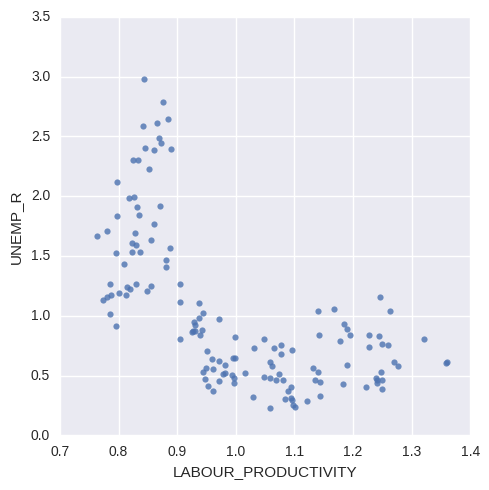

In [59]:
#Based on this. Similar points for unemployment have similar points for productivity
sns.lmplot(x="LABOUR_PRODUCTIVITY",y="UNEMP_R",data=df_fixed,fit_reg=False)

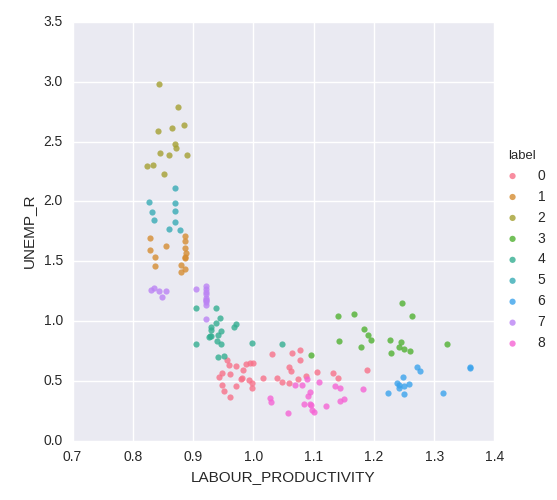

In [61]:
Image("figures/labels.png")

Using a random sample => MCAR DATA


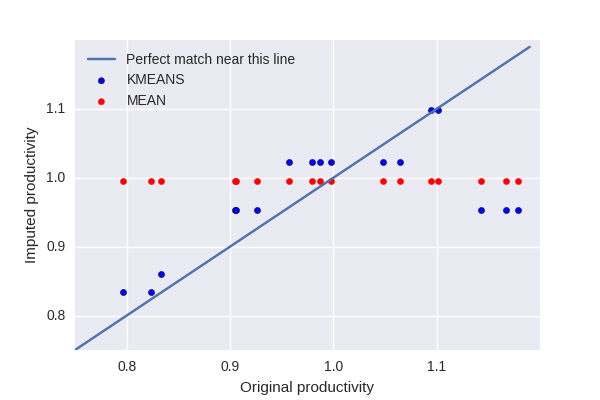

In [62]:
print("Using a random sample => MCAR DATA")
Image("figures/kmeans_vs_mean.png")

Using a biasad sample => MAR DATA


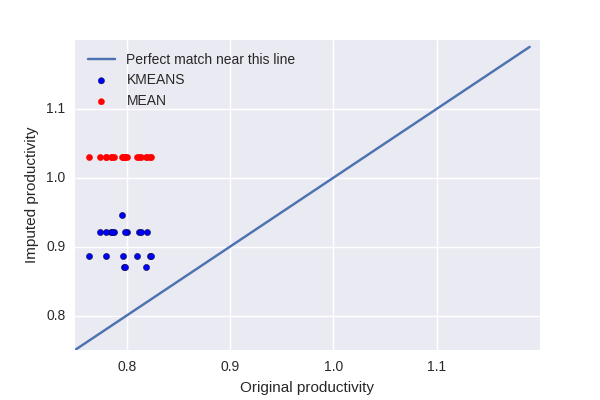

In [63]:
print("Using a biasad sample => MAR DATA")
Image("figures/kmeans_vs_mean_worst_case.png")

## But first of all we need to make sure we have missing values instead of "-9" or other strings
- The way to do it is to explore the file and then read it:

pd.read_csv(filename,...,na_values=[`here the list of missing values`]

## 6. Dealing with outliers
In short:
- If the outlier is *obviously wrong* you should treat it as missing data. For instance if you record a value of 19 in a 0-10 scale (it was problably 1 or 9, but we don't know).
- If the outlier is *not obviously wrong", you should keep it. For instance if most people say 3 in a 0-10 scale but a couple say 9, then you need to keep it. You can use `robust` statistics, that are not so affected by outliers. 


More info at another time, but read this:
http://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/